In [1]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.shape

(5728, 2)

In [7]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [9]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [11]:
import seaborn as sns

<Axes: ylabel='count'>

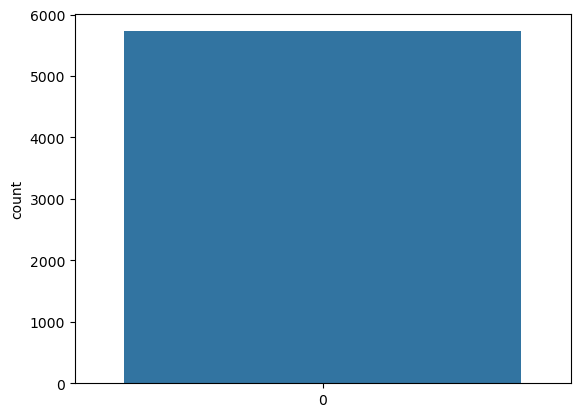

In [12]:
sns.countplot(data['spam'])

In [15]:
data.duplicated().sum()

33

In [17]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

In [21]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [23]:
data.shape

(5695, 2)

In [25]:
5728 - 33

5695

<Axes: ylabel='count'>

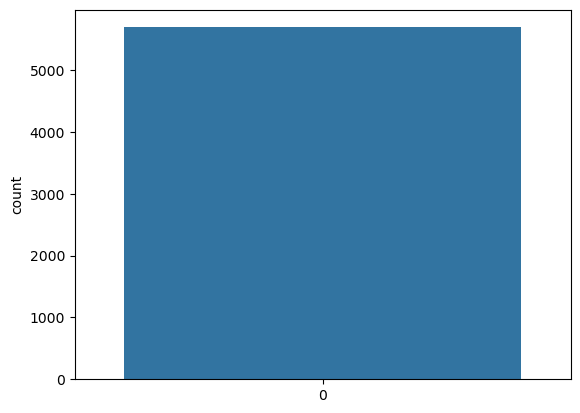

In [27]:
sns.countplot(data['spam'])

In [29]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

# Separate in X and Y

In [32]:
X = data['text'].values
y = data['spam'].values

In [34]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Train - Test split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [39]:
X_train.shape

(4556,)

In [41]:
X_test.shape

(1139,)

In [43]:
y_train.shape

(4556,)

In [45]:
y_test.shape

(1139,)

# Preprocessing 

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
cv = CountVectorizer()


# Training by ML Algorithm

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [55]:
pipe = make_pipeline(cv, nb)

In [57]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [59]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.990342405618964

In [ ]:
email = ['Hey i am Elon Musk Get a brand new car from Tesla']
pipe.predict(email)

array([1])

In [69]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))